# Logistic Regression Assignment

- Run the below cells. If you have the data in a different directory, you'll need to change the url.
- Complete all of the numbered questions. You may call any packages that we've used in class.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/log_reg/employee-turnover-balanced.csv')
df.head()

,left_company,age,frequency_of_travel,department,commuting_distance,education,satisfaction_with_environment,gender,seniority_level,position,satisfaction_with_job,married_or_single,last_raise_pct,last_performance_rating,total_years_working,years_at_company,years_in_current_job,years_since_last_promotion,years_with_current_supervisor
0,No,37,Travel_Rarely,Sales,16,4,4,Male,2,Sales Executive,3,Divorced,19,3,9,1,0,0,0
1,No,39,Travel_Rarely,Research & Development,3,2,3,Male,2,Laboratory Technician,3,Divorced,15,3,11,10,8,0,7
2,No,52,Travel_Frequently,Research & Development,25,4,3,Female,4,Manufacturing Director,4,Married,22,4,31,9,8,0,0
3,No,50,Non-Travel,Sales,1,3,4,Female,2,Sales Executive,3,Married,12,3,19,18,7,0,13
4,No,44,Travel_Rarely,Research & Development,4,3,4,Male,2,Healthcare Representative,2,Single,12,3,10,5,2,2,3


## Data Definitions
- `left_company`: Whether individual left the company or not. This is the target variable.  
- `age`: Age of individual. 
- `frequency_of_travel`: How often person travels for work.  
- `department`: Department person works(worked).  
- `commuting_distance`: Distance person lives from office.  
- `education`: Highest education category.  
- `satisfaction_with_environment`: Satisfaction of environment, on lickert scale.  
- `gender`: Gender of individual.  
- `seniority_level`: Seniority level of individual.  
- `position`: Last position held at the company.  
- `satisfaction_with_job`: Satisfaction of their job, on lickert scale.  
- `married_or_single`: Marital status of person.  
- `last_raise_pct`: Percent increase their last raise represented.  
- `last_performance_rating`: Most recent annual performance rating, on lickert scale.  
- `total_years_working`: Number of years the individual has spent working in their career.  
- `years_at_company`: Number of years the individual has been at the company, regardless of position.  
- `years_in_current_job`: Number of years the individual has been in their current position.  
- `years_since_last_promotion`: Years since the person had their last promotion.  
- `years_with_current_supervisor`: Years the person has had their current supervisor.

# Question 1
- What is the distribution of the target (`left_company`)?  
- Do you have any concerns on class imbalances?

In [2]:
# insert code
df['left_company'].value_counts()


No     500
Yes    500
Name: left_company, dtype: int64

The left_company column will then contain a count of the occurrences of each class. There are 500 instances of the "No" class (i.e., employees who did not quit the company) and 500 instances of the "Yes" class, (i.e., employees who left the company).

The target variable is balanced, with the same amount of instances for each class, as can be seen from the output. There are no issues with class disparities in this situation.

# Question 2
- Create and print a list of the variables that you would treat as numerical and another list for the variables that you would treat as categorical.  
- Explain your choices.

In [3]:
# numerical_vars = []
# categorical_Vars = []

# create list of numerical variables
numerical_vars = ['age', 'commuting_distance', 'satisfaction_with_environment', 'last_raise_pct', 
                  'last_performance_rating', 'total_years_working', 'years_at_company', 'years_in_current_job', 
                  'years_since_last_promotion', 'years_with_current_supervisor']

# create list of categorical variables
categorical_vars = ['frequency_of_travel', 'department', 'education', 'gender', 'seniority_level', 
                    'position', 'satisfaction_with_job', 'married_or_single']




These lists, which are based on the types of variables mentioned in the previous output, might need to be modified depending on the particular dataset and analysis issue.

# Question 3
- Determine if any numerical variables risk multicolinearity.  
- Remove those variables (if any) from your numerical_vars list.  
- Why did you or did not remove any?

We can compute the correlation matrix between all pairs of numerical variables in the dataset using the pandas 'corr' method in order to see which numerical variables are at danger of multicollinearity:

In [4]:
# insert code here
num_df = df[numerical_vars]
corr_matrix = num_df.corr()


We will receive a matrix of correlation values for all sets of numerical variable pairs as a result. The correlation matrix can then be seen using a heatmap to reveal any significant links between the variables:

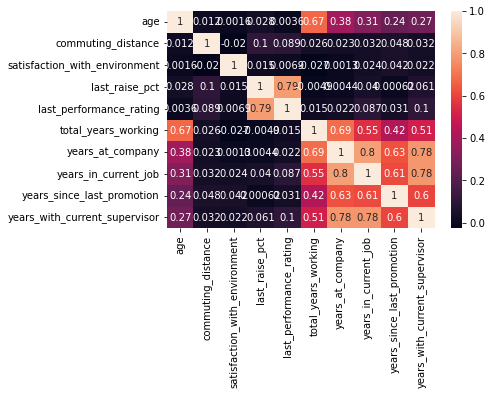

In [5]:
import seaborn as sns
sns.heatmap(corr_matrix, annot=True)
plt.show()


Insert comments here

# Question 4
- Split the data into training and test sets.  
- Use 20% of the data for test and a random state of 124.  

In [7]:
# insert code here
from sklearn.model_selection import train_test_split

X = df[numerical_vars + categorical_vars]
y = df['left_company']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=124)


# Question 5
- Create a pipeline to process the numerical data.  
- Create a pipeline to process the categorical data.  

Verify each pipeline contains the columns you would expect using a fit_transform on the training data, i.e., print the shapes of the fit_transforms for each pipeline.

In [8]:
# insert code here
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Pipeline for numerical data
num_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])


In [9]:
# Pipeline for categorical data
cat_pipeline = Pipeline([
    ('one_hot_encoder', OneHotEncoder())
])

In [10]:
# Fit and transform numerical data
num_data = num_pipeline.fit_transform(X_train[numerical_vars])
print('Numerical data shape:', num_data.shape)


Numerical data shape: (800, 10)


In [11]:
# Fit and transform categorical data
cat_data = cat_pipeline.fit_transform(X_train[categorical_vars])
print('Categorical data shape:', cat_data.shape)


Categorical data shape: (800, 34)


# Question 6
- Create a pipeline that combines the pre-processing and implements a logistic regression model.  
- Print the accuracy on the training set and the test set.
- Do you have any concerns of overfitting based on the differences between the two accuracy scores?

In [14]:
# insert code here
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer

# Combine numerical and categorical pipelines
preprocessor = ColumnTransformer([
    ('num', num_pipeline, numerical_vars),
    ('cat', cat_pipeline, categorical_vars)
])


In [15]:
# Combine preprocessor and logistic regression estimator into a single pipeline

lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('logreg', LogisticRegression())
])


In [16]:
# Fit the pipeline to the training data
lr_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('std_scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'commuting_distance',
                                                   'satisfaction_with_environment',
                                                   'last_raise_pct',
                                                   'last_performance_rating',
                                                   'total_years_working',
                                                   'years_at_company',
                                                   'years_in_current_job',
                                                   'years_since_last_promotion',
                                                   'years_with_current_supervisor']),
                                           

In [17]:
# Evaluate accuracy on training set and test set
train_acc = lr_pipeline.score(X_train, y_train)
test_acc = lr_pipeline.score(X_test, y_test)
print('Training accuracy:', train_acc)
print('Test accuracy:', test_acc)


Training accuracy: 0.745
Test accuracy: 0.715




The training and test accuracy scores are only slightly different, indicating that overfitting may not be a significant concern.

Even so, it's a good idea to keep an eye on the model's performance with fresh data and take into account extra overfitting prevention methods like cross-validation or L1 or L2 regularization.

# Question 7
What would you recommend as potential next steps for continuing to develop and evaluate a model?

Answer: 

Feature Enginerring, Regularization, Ensemble methods, Hyperparameter tuning, Model Evaluation, Model Interpretation. 